## Hate Speech and Offensive Language Detection

Hate speech detection is an important tool for combating hate speech, particularly on social media. Several methods have been developed for the task, including a recent proliferation of machine-learning and deep-learning model-based approaches. Because hate speech data sets are rarely clean, they must be pre-processed before classification algorithms can detect hate speech. Different machine learning models have different strengths, making some better than others at certain tasks like detecting hate speech. Some models are more accurate than others in terms of efficiency. It is critical to employ various models and compare their performance in order to identify the best one for hate speech detection. Pre-training methods have grown in popularity in recent years, and it is important to test whether they work well with hate speech detection algorithms. It is also important to see how hate speech detection models can be used to address domain changes.


In [2]:
import numpy as np # basic Libraries  
import pandas as pd 
import seaborn as sns
import nltk 
import warnings
warnings.filterwarnings('ignore')

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/dsm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import re # regular expression module 
stemmer = nltk.SnowballStemmer("english") # for stemming 
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english')) # for stopword

In [5]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re, string, unicodedata
from string import punctuation

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud # module for wordcloud 

In [7]:
df = pd.read_csv("labeled_data.csv") # data reading

In [8]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
df.shape 

(24783, 7)

In [10]:
df.isnull().sum() # null value in data

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [11]:
# dataframe transformation 
df.drop(df.columns[[0,1,2,3,4]], axis=1, inplace=True)
  
df.head(10)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


<AxesSubplot:xlabel='class', ylabel='count'>

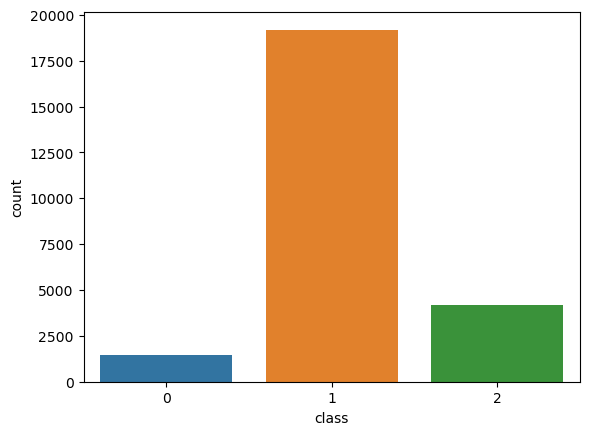

In [12]:
sns.countplot(x='class',data=df) # count of class in data

In [13]:
hate, offensive, neither = np.bincount(df['class']) # percentage of class in data
total = hate + offensive + neither
print('Class 0:\n    Total: {}\n    hate: {} ({:.2f}% of total)\n'.format(
    total, hate, 100 * hate / total))
print('Class 1:\n    Total: {}\n    Offensive: {} ({:.2f}% of total)\n'.format(
    total, offensive, 100 * offensive / total))
print('Class 2:\n    Total: {}\n    Neither: {} ({:.2f}% of total)\n'.format(
    total, neither, 100 * neither / total))

Class 0:
    Total: 24783
    hate: 1430 (5.77% of total)

Class 1:
    Total: 24783
    Offensive: 19190 (77.43% of total)

Class 2:
    Total: 24783
    Neither: 4163 (16.80% of total)



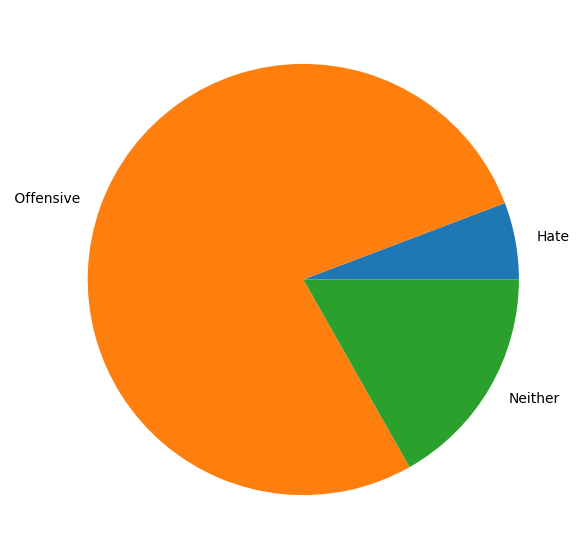

In [14]:
classes = ['Hate', ' Offensive','Neither']
Total = [1430,19190,4163]
fig = plt.figure(figsize =(10, 7))
plt.pie(Total, labels = classes)
plt.show()

In [15]:
'''def clean_text(text):  # data cleaning funtion
    text = str(text).lower() # lower the text
    text = re.sub('\[.*?\]', '', text) # removing puncatuation
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword] # removing stopword
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')] # stemming
    text=" ".join(text)
    return text '''

'def clean_text(text):  # data cleaning funtion\n    text = str(text).lower() # lower the text\n    text = re.sub(\'\\[.*?\\]\', \'\', text) # removing puncatuation\n    text = re.sub(\'https?://\\S+|www\\.\\S+\', \'\', text)\n    text = re.sub(\'<.*?>+\', \'\', text)\n    text = re.sub(\'[%s]\' % re.escape(string.punctuation), \'\', text)\n    text = re.sub(\'\n\', \'\', text)\n    text = re.sub(\'\\w*\\d\\w*\', \'\', text)\n    text = [word for word in text.split(\' \') if word not in stopword] # removing stopword\n    text=" ".join(text)\n    text = [stemmer.stem(word) for word in text.split(\' \')] # stemming\n    text=" ".join(text)\n    return text '

In [16]:
def hapus_url(text):
    return re.sub(r'http\S+','', text)
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
def stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text=' '.join([ps.stem(word) for word in text.split()])
    return text

def final_clean(text):
    final_text= []
    for i in text.split():
        if i.strip().lower() not in stopword and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

In [17]:
def clean(text):
    text = hapus_url(text)
    text = remove_special_characters(text, remove_digits=True)
    text = stemmer(text)
    text = final_clean(text)
    return text

In [18]:
df['tweet'] = df['tweet'].apply(clean)

In [19]:
#df1['text']=df1['text'].apply(clean_text) # apply the function on text

In [20]:
df.tail()

,class,tweet
24778,1,muthafin lie coreyemanuel right hi tl trash mi...
24779,2,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie
24782,2,ruffl ntac eileen dahlia beauti color combin p...


In [21]:
text = " ".join(cat for cat in df.tweet) # joining of all sentence in variable text

In [22]:
top_N =  20 # top 20 frequent sentence in data
word_dist = nltk.FreqDist(df['tweet'])
print('All frequencies')
print('='*60)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['sentence','Frequency'])

print(rslt)
print ('='*60)

All frequencies
                                             sentence  Frequency
0                                               bitch         25
1                                                 hoe         15
2                                               pussi         14
3           best asian massag park slope top rate spa         14
4                                              faggot         10
5                                      hoe aint loyal          8
6          grand open top class orient massag perfect          8
7                           bad bitch onli thing like          7
8                                          fuck bitch          6
9   best asian massag brooklyn park slope top rate...          5
10                                                fag          5
11                                      dont love hoe          5
12                                  rt hoe aint loyal          5
13                                          thi bitch          5
14       

In [23]:
df.tweet.str.split(expand=True).stack().value_counts() # word frequency

bitch                     11180
rt                         7584
hoe                        4204
like                       2843
fuck                       2238
                          ...  
boister                       1
belliger                      1
damnismartallofasudden        1
zigeun                        1
coll                          1
Length: 25283, dtype: int64

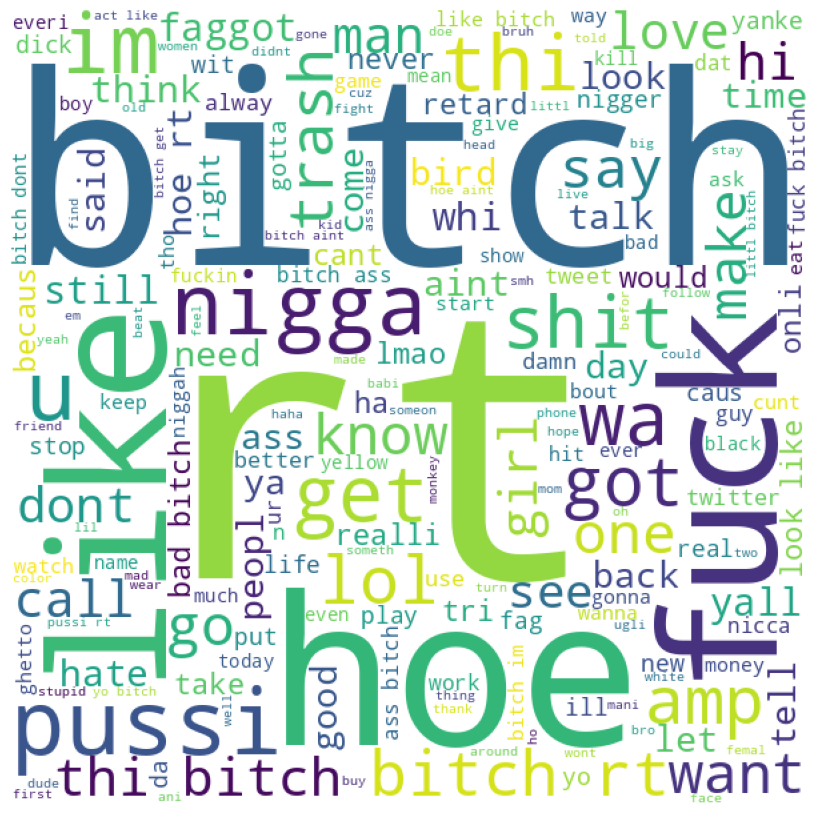

In [24]:
# wordcloud chart
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopword,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Word2vec

TF-IDF

In [25]:
x = df['tweet']
y = df['class']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0,stratify=y)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(x)
xv_train = Tfidf_vect.transform(x_train)
xv_test = Tfidf_vect.transform(x_test)

In [29]:
("n_samples: %d, n_features: %d" % xv_train.shape)

'n_samples: 18587, n_features: 25265'

In [30]:
xv_train.shape,y_train.shape

((18587, 25265), (18587,))

# **Feature Engineering**

Undersampling

In [31]:
'''class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]
class_2 = df[df['class'] == 2]'''

"class_0 = df[df['class'] == 0]\nclass_1 = df[df['class'] == 1]\nclass_2 = df[df['class'] == 2]"

In [32]:
#class_0.shape,class_1.shape,class_2.shape

In [33]:
#n = len(class_0)

In [34]:
'''df_class_1_under = class_1.sample(n)
df_class_2_under = class_2.sample(n)
data = pd.concat([class_0,df_class_1_under,df_class_2_under], axis=0)

print('Random under-sampling:')
print(data['class'].value_counts())'''

"df_class_1_under = class_1.sample(n)\ndf_class_2_under = class_2.sample(n)\ndata = pd.concat([class_0,df_class_1_under,df_class_2_under], axis=0)\n\nprint('Random under-sampling:')\nprint(data['class'].value_counts())"

**Oversampling**

In [35]:
#df['class'].value_counts()

In [36]:
#count_class_1 = len(class_1)

In [37]:
# Oversample 1-class and concat the DataFrames of both classes
'''class_0_over = class_0.sample(count_class_1, replace=True)
class_2_over = class_2.sample(count_class_1, replace=True)
df_over = pd.concat([class_0_over, class_1,class_2_over], axis=0)

print('Random over-sampling:')
print(df_over['class'].value_counts())'''

"class_0_over = class_0.sample(count_class_1, replace=True)\nclass_2_over = class_2.sample(count_class_1, replace=True)\ndf_over = pd.concat([class_0_over, class_1,class_2_over], axis=0)\n\nprint('Random over-sampling:')\nprint(df_over['class'].value_counts())"

In [38]:
#df_over.shape, df.shape

SMOTE

In [39]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(xv_train, y_train)
y_train.value_counts()

2    14392
1    14392
0    14392
Name: class, dtype: int64

In [42]:
x_test, y_test = oversample.fit_resample(xv_test, y_test)
y_test.value_counts()

1    4798
2    4798
0    4798
Name: class, dtype: int64

# Model Training

**Logistic** Model

In [43]:
#from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [44]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [45]:
perd_log=log.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,perd_log)

array([[2931, 1579,  288],
       [ 432, 4149,  217],
       [  61,  168, 4569]])

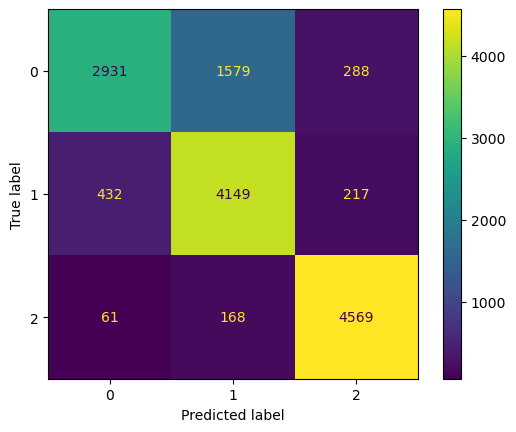

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, perd_log, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()

In [49]:
print(classification_report(perd_log, y_test))

              precision    recall  f1-score   support

           0       0.61      0.86      0.71      3424
           1       0.86      0.70      0.78      5896
           2       0.95      0.90      0.93      5074

    accuracy                           0.81     14394
   macro avg       0.81      0.82      0.80     14394
weighted avg       0.84      0.81      0.81     14394



In [50]:
from yellowbrick.classifier import PrecisionRecallCurve

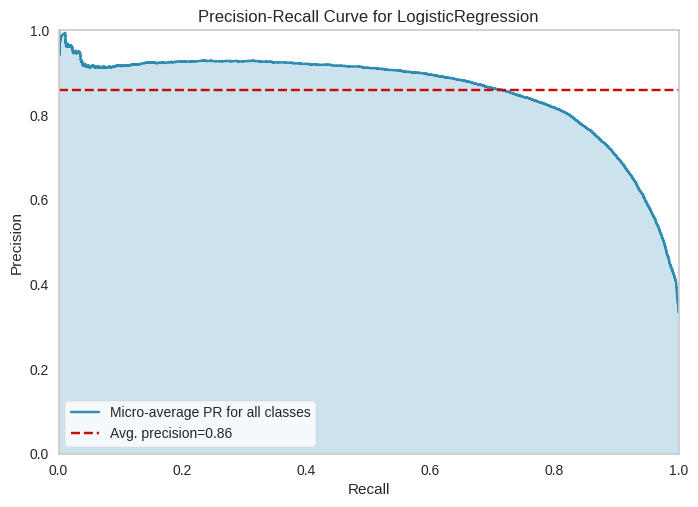

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [51]:
viz = PrecisionRecallCurve(log)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

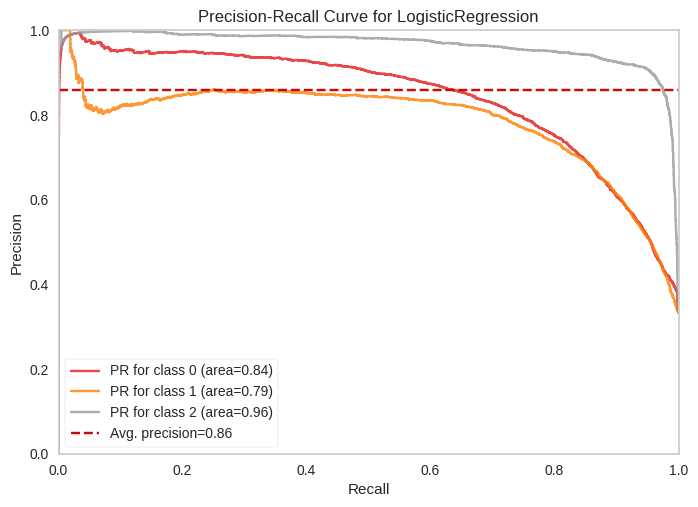

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [52]:
viz = PrecisionRecallCurve(log,
    per_class=True,
    cmap="Set1")
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

In [53]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, x_train ,y_train, x_test, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'hate', 
                                        1: 'Offensive', 
                                        2: 'neither'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()
    
    return visualizer

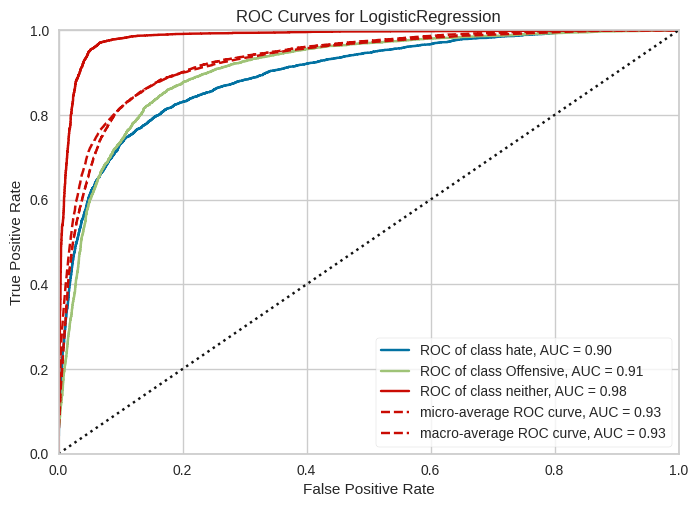

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'hate', 1: 'Offensive', 2: 'neither'},
       estimator=LogisticRegression())

In [54]:
plot_ROC_curve(log, x_train ,y_train, x_test, y_test)

In [55]:
# Logistic Model hyperparameter 

In [56]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [57]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [58]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [59]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [60]:
grid_search = GridSearchCV(estimator=log, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

/home/dsm/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dsm/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/dsm/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dsm/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/dsm/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dsm/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/dsm/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dsm/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/dsm/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dsm/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/dsm/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dsm/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [61]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.955508 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.953910 (0.002401) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.955292 (0.002611) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.955508 (0.002302) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.952173 (0.002340) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.951678 (0.002439) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.948837 (0.002432) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.927637 (0.003091) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.927660 (0.003066) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.912891 (0.003469) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.871912 (0.004694) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.871920 (0.004682) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.859976 (0.004991) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.821490 (0.004718) wit

In [62]:
log_hype = LogisticRegression(C = 100, penalty = 'l1', solver = 'liblinear')
log_hype.fit(x_train, y_train)

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [63]:
perd_log_hype =log_hype.predict(x_test)

In [64]:
print(classification_report(perd_log_hype, y_test))

              precision    recall  f1-score   support

           0       0.41      0.78      0.53      2491
           1       0.88      0.55      0.68      7646
           2       0.83      0.94      0.88      4257

    accuracy                           0.71     14394
   macro avg       0.71      0.76      0.70     14394
weighted avg       0.79      0.71      0.71     14394



In [65]:
confusion_matrix(y_test,perd_log_hype)

array([[1948, 2716,  134],
       [ 423, 4240,  135],
       [ 120,  690, 3988]])

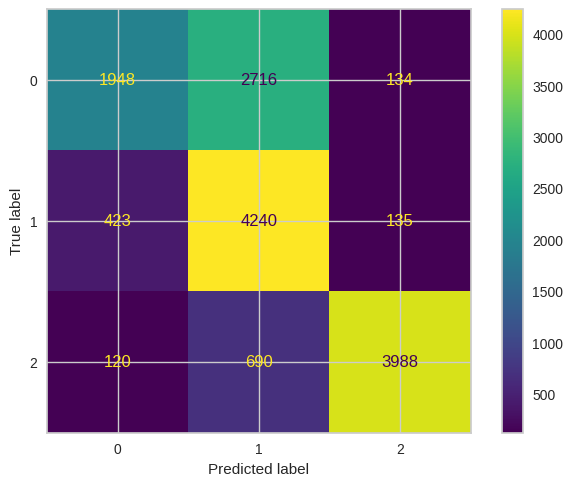

In [66]:
cm = confusion_matrix(y_test, perd_log_hype, labels=log_hype.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_hype.classes_)
disp.plot()

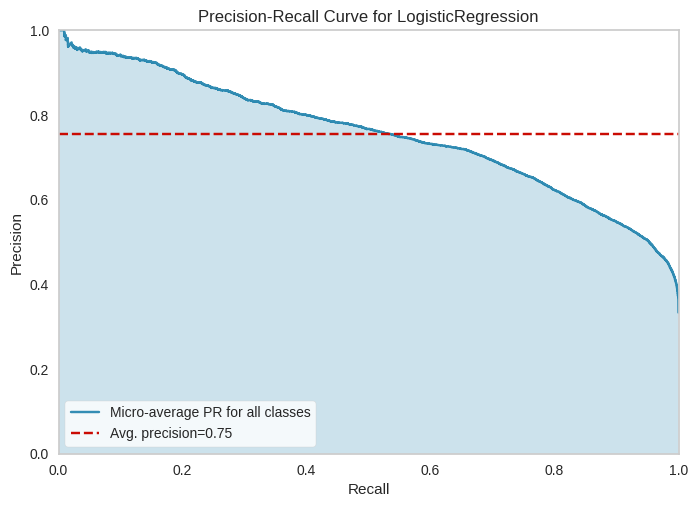

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [67]:
viz = PrecisionRecallCurve(log_hype)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

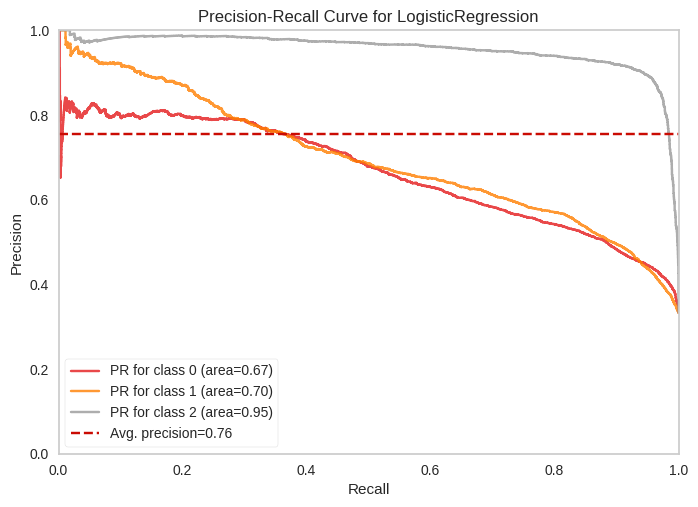

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [68]:
viz = PrecisionRecallCurve(log_hype,
    per_class=True,
    cmap="Set1")
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

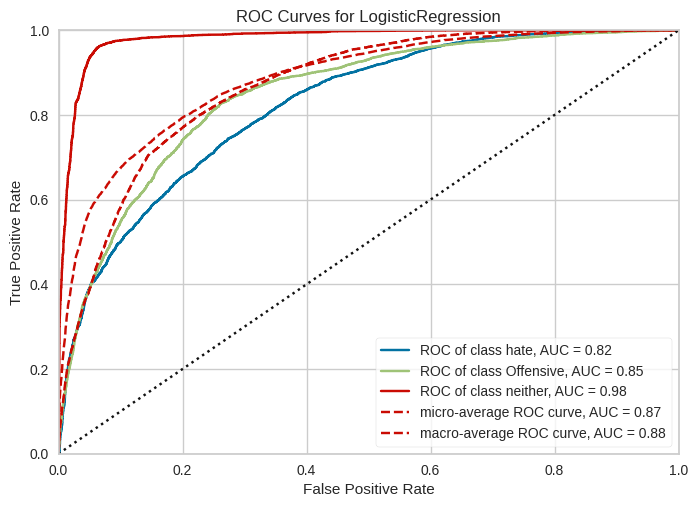

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'hate', 1: 'Offensive', 2: 'neither'},
       estimator=LogisticRegression(C=100, penalty='l1', solver='liblinear'))

In [69]:
plot_ROC_curve(log_hype, x_train ,y_train, x_test, y_test)

SVM

In [70]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [71]:
pred_svm = model.predict(x_test)

In [72]:
confusion_matrix(y_test,pred_svm)

array([[3550,  913,  335],
       [  38, 4649,  111],
       [  57,  244, 4497]])

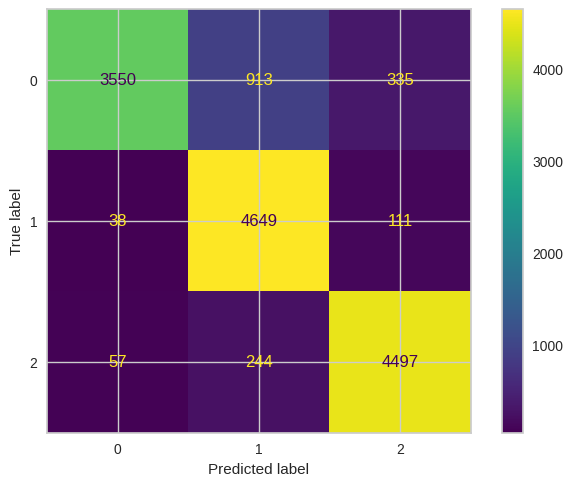

In [73]:
cm = confusion_matrix(y_test, pred_svm, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [74]:
print(classification_report(pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84      3645
           1       0.97      0.80      0.88      5806
           2       0.94      0.91      0.92      4943

    accuracy                           0.88     14394
   macro avg       0.88      0.89      0.88     14394
weighted avg       0.90      0.88      0.88     14394



In [ ]:
viz = PrecisionRecallCurve(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

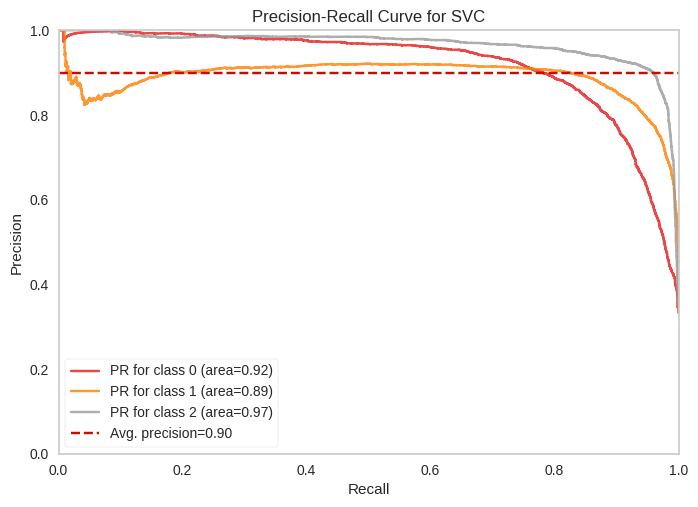

<AxesSubplot:title={'center':'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [76]:
viz = PrecisionRecallCurve(model,
    per_class=True,
    cmap="Set1")
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

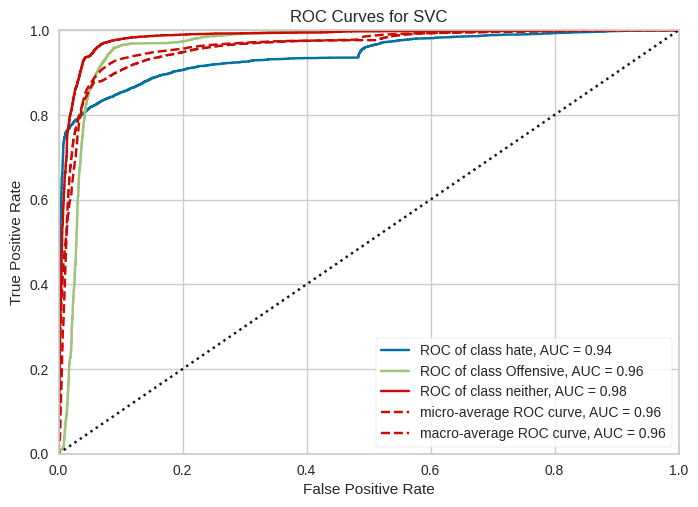

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'hate', 1: 'Offensive', 2: 'neither'}, estimator=SVC())

In [77]:
plot_ROC_curve(model, x_train ,y_train, x_test, y_test)

SVC hyperparameter

In [78]:
# grid search
'''param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': [ 'rbf', 'sigmoid']} 
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)'''

"param_grid = {'C': [0.1, 1], \n              'gamma': [1, 0.1],\n              'kernel': [ 'rbf', 'sigmoid']} \ngrid = GridSearchCV(model, param_grid, refit = True, verbose = 3)\ngrid.fit(x_train, y_train)"

In [79]:
#print(grid.best_params_)

In [80]:
#print(grid.best_estimator_)

In [81]:
model_hype = SVC(C=1, gamma=1,kernel ='rbf')
model_hype.fit(x_train,y_train)

SVC(C=1, gamma=1)

In [82]:
pred_svm_hype = model_hype.predict(x_test)

In [83]:
confusion_matrix(y_test,pred_svm_hype)

array([[3656,  795,  347],
       [  50, 4635,  113],
       [  57,  204, 4537]])

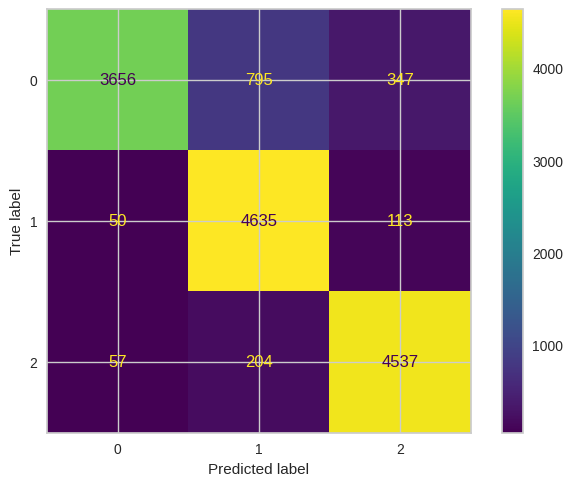

In [84]:
cm = confusion_matrix(y_test, pred_svm_hype, labels=model_hype.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = model_hype.classes_)
disp.plot()

In [85]:
print(classification_report(pred_svm_hype, y_test))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      3763
           1       0.97      0.82      0.89      5634
           2       0.95      0.91      0.93      4997

    accuracy                           0.89     14394
   macro avg       0.89      0.90      0.89     14394
weighted avg       0.91      0.89      0.89     14394



In [ ]:
viz = PrecisionRecallCurve(model_hype)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

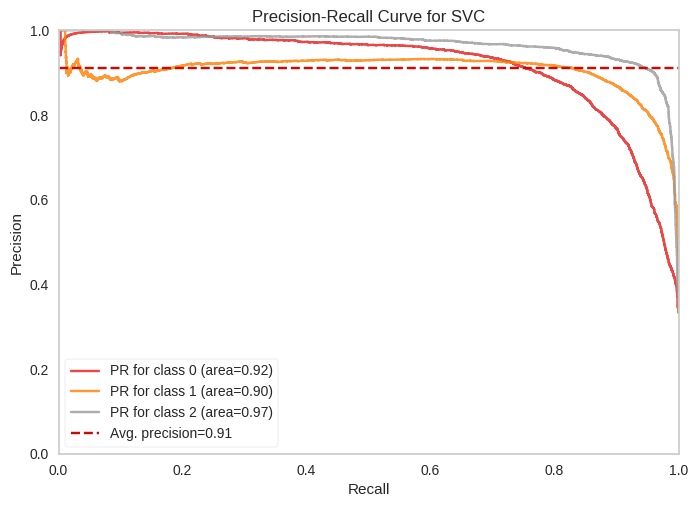

<AxesSubplot:title={'center':'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [87]:
viz = PrecisionRecallCurve(model_hype,
    per_class=True,
    cmap="Set1")
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

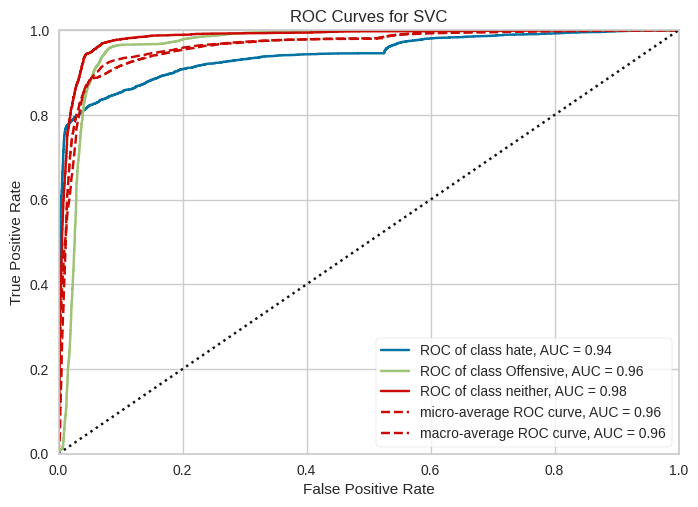

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'hate', 1: 'Offensive', 2: 'neither'},
       estimator=SVC(C=1, gamma=1))

In [88]:
plot_ROC_curve(model_hype, x_train ,y_train, x_test, y_test)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier  

In [ ]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=45)  
classifier.fit(x_train, y_train)

In [ ]:
pred_tre = classifier.predict(x_test)

In [ ]:
confusion_matrix(y_test,pred_tre)

In [ ]:
cm = confusion_matrix(y_test, pred_tre, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [ ]:
print(classification_report(pred_tre, y_test))

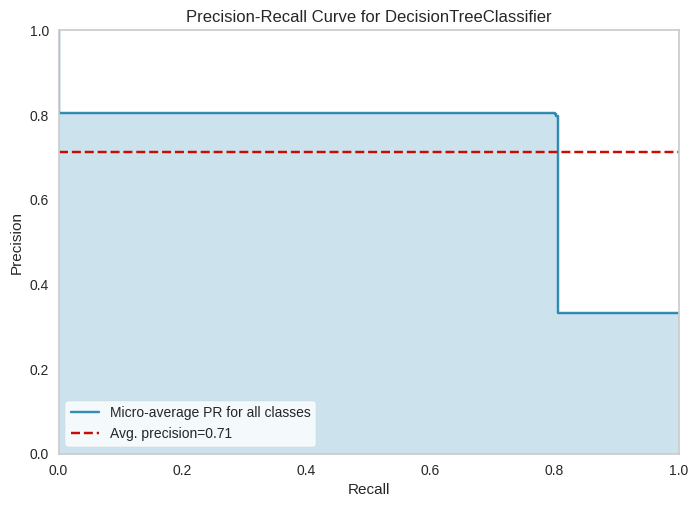

<AxesSubplot:title={'center':'Precision-Recall Curve for DecisionTreeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [95]:
viz = PrecisionRecallCurve(classifier)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

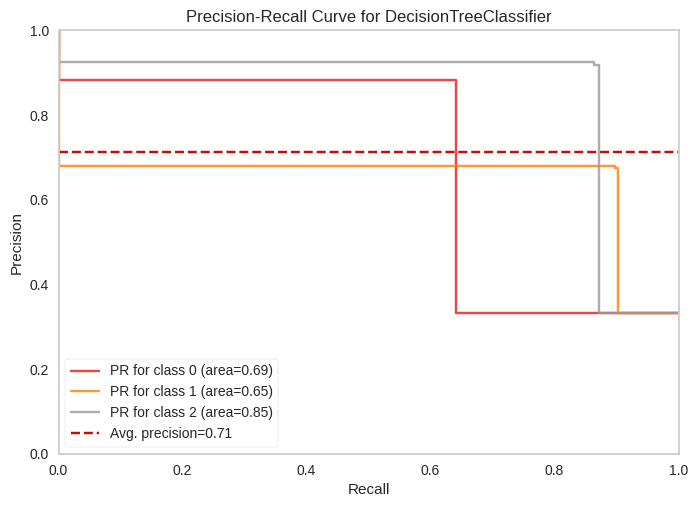

<AxesSubplot:title={'center':'Precision-Recall Curve for DecisionTreeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [96]:
viz = PrecisionRecallCurve(classifier,
    per_class=True,
    cmap="Set1")
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

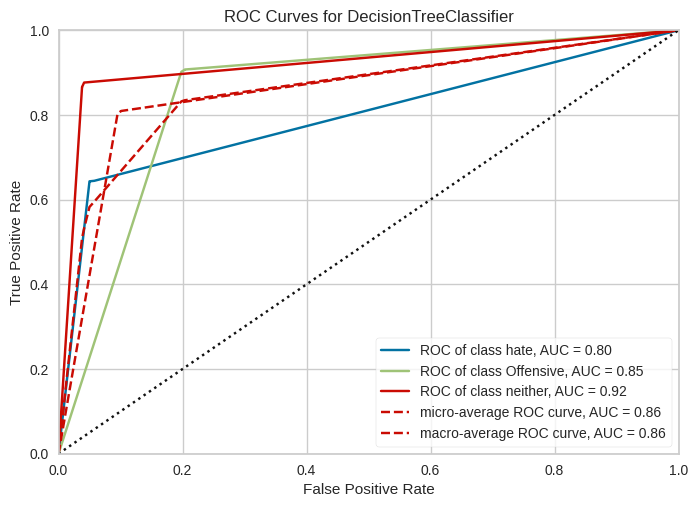

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'hate', 1: 'Offensive', 2: 'neither'},
       estimator=DecisionTreeClassifier(criterion='entropy', random_state=45))

In [97]:
plot_ROC_curve(classifier, x_train ,y_train, x_test, y_test)

Decision Tree Hyperparameters

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [100]:
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [101]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=45),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [102]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}


In [103]:
classifier_hype = DecisionTreeClassifier(criterion='entropy', max_depth = 10, min_samples_leaf= 5)  
classifier_hype.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)

In [104]:
pred_tre_hype = classifier_hype.predict(x_test)

In [105]:
confusion_matrix(y_test,pred_tre_hype)

array([[2821,  751, 1226],
       [ 308, 3857,  633],
       [ 104,   55, 4639]])

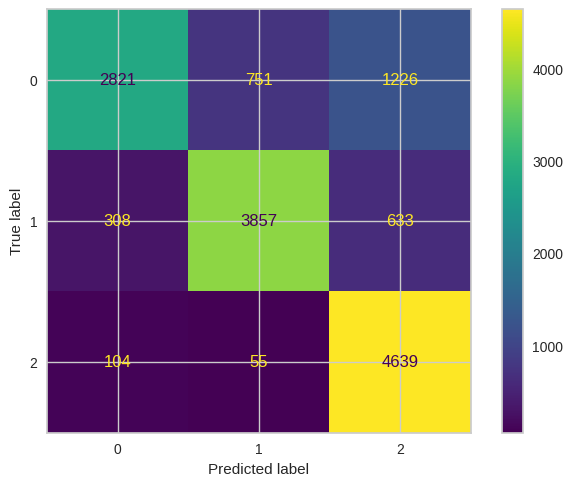

In [106]:
cm = confusion_matrix(y_test, pred_tre_hype, labels=classifier_hype.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier_hype.classes_)
disp.plot()

In [107]:
print(classification_report(pred_tre_hype, y_test))

              precision    recall  f1-score   support

           0       0.59      0.87      0.70      3233
           1       0.80      0.83      0.82      4663
           2       0.97      0.71      0.82      6498

    accuracy                           0.79     14394
   macro avg       0.79      0.80      0.78     14394
weighted avg       0.83      0.79      0.79     14394



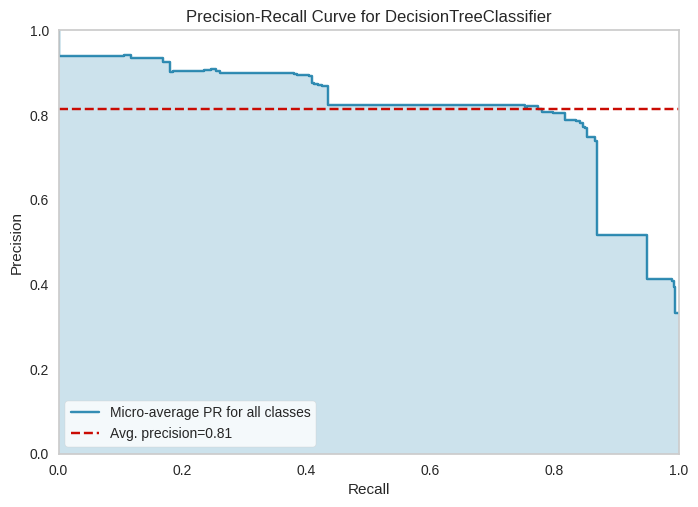

<AxesSubplot:title={'center':'Precision-Recall Curve for DecisionTreeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [108]:
viz = PrecisionRecallCurve(classifier_hype)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

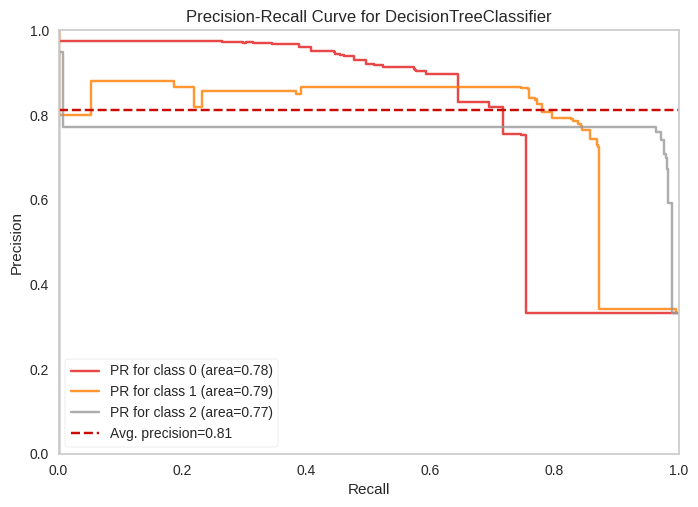

<AxesSubplot:title={'center':'Precision-Recall Curve for DecisionTreeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [109]:
viz = PrecisionRecallCurve(classifier_hype,
    per_class=True,
    cmap="Set1")
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

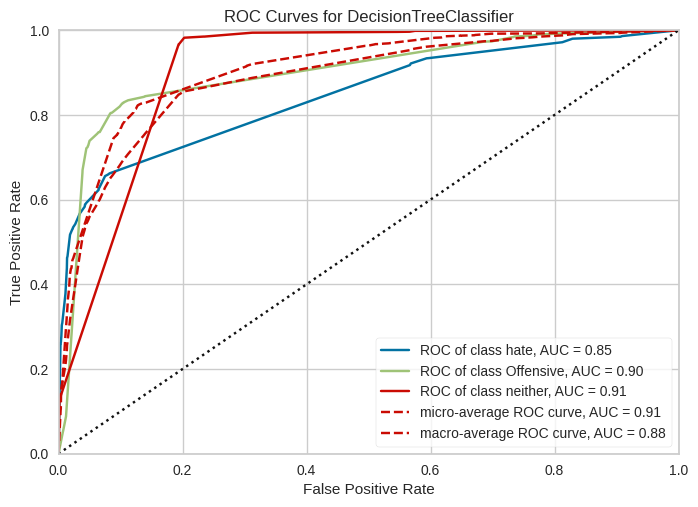

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'hate', 1: 'Offensive', 2: 'neither'},
       estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=5))

In [110]:
plot_ROC_curve(classifier_hype, x_train ,y_train, x_test, y_test)

Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
ran=RandomForestClassifier(n_estimators=100)
ran.fit(x_train,y_train)
perd_ran=ran.predict(x_test)

In [113]:
confusion_matrix(y_test,perd_ran)

array([[2847, 1668,  283],
       [ 182, 4483,  133],
       [  70,  320, 4408]])

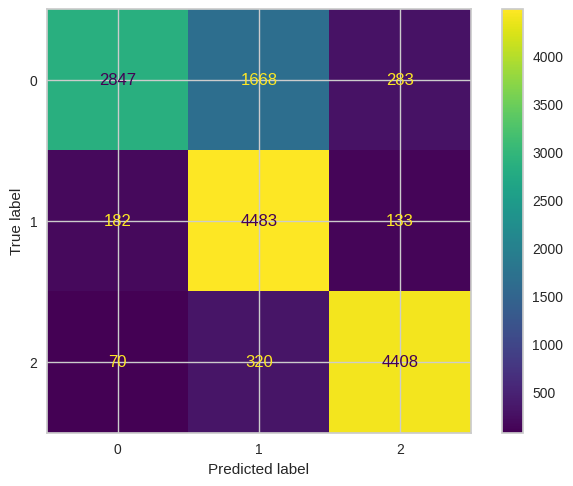

In [114]:
cm = confusion_matrix(y_test, perd_ran, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

In [115]:
print(classification_report(perd_ran, y_test))

              precision    recall  f1-score   support

           0       0.59      0.92      0.72      3099
           1       0.93      0.69      0.80      6471
           2       0.92      0.91      0.92      4824

    accuracy                           0.82     14394
   macro avg       0.82      0.84      0.81     14394
weighted avg       0.86      0.82      0.82     14394



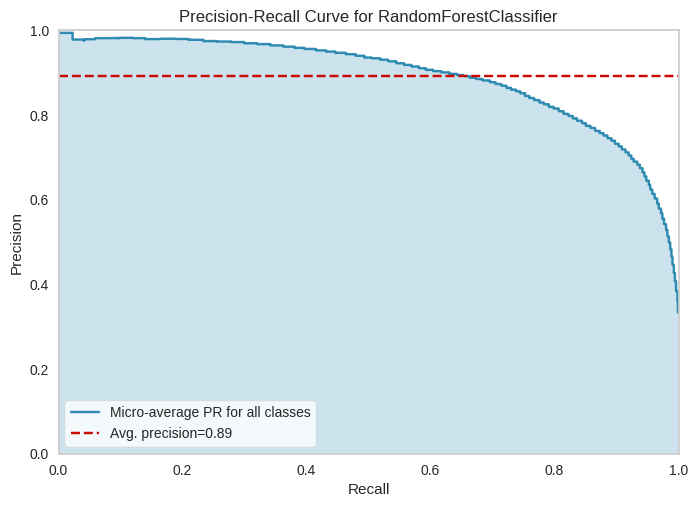

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [116]:
viz = PrecisionRecallCurve(ran)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

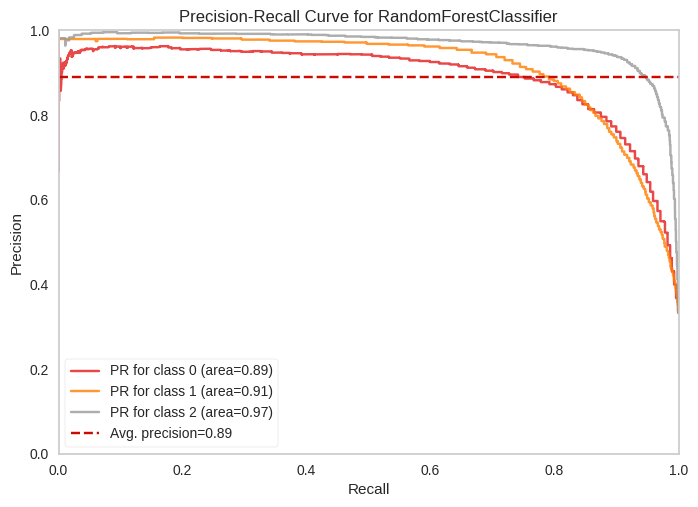

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [117]:
viz = PrecisionRecallCurve(ran,
    per_class=True,
    cmap="Set1")
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

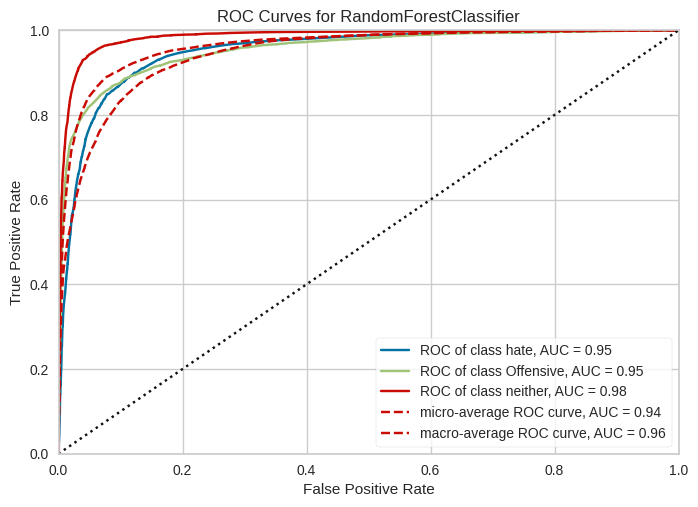

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'hate', 1: 'Offensive', 2: 'neither'},
       estimator=RandomForestClassifier())

In [118]:
plot_ROC_curve(ran, x_train ,y_train, x_test, y_test)

# Ensemble Learning Model

Algorithms based on Bagging and Boosting

Xgboost Model

In [119]:
import xgboost as xgb

In [120]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [121]:
pred_xg = xgb_classifier.predict(x_test)

In [122]:
confusion_matrix(y_test,pred_xg)

array([[3939,  581,  278],
       [ 264, 4296,  238],
       [ 123,   76, 4599]])

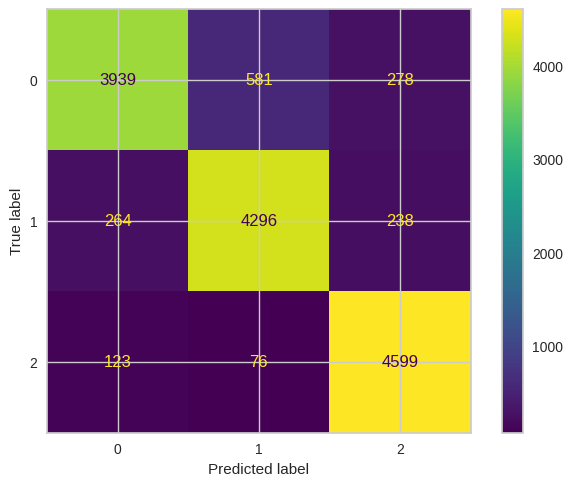

In [123]:
cm = confusion_matrix(y_test, pred_xg, labels=xgb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_classifier.classes_)
disp.plot()

In [124]:
print(classification_report(pred_xg, y_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4326
           1       0.90      0.87      0.88      4953
           2       0.96      0.90      0.93      5115

    accuracy                           0.89     14394
   macro avg       0.89      0.89      0.89     14394
weighted avg       0.90      0.89      0.89     14394



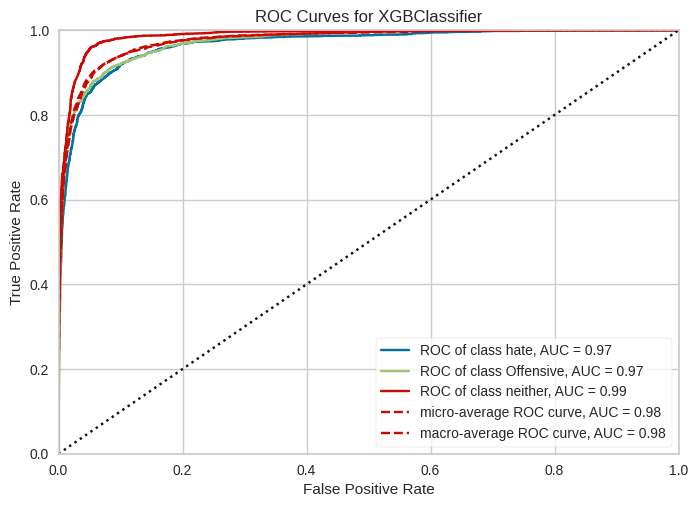

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'hate', 1: 'Offensive', 2: 'neither'},
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, ev...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto', ...))

In [125]:
plot_ROC_curve(xgb_classifier, x_train ,y_train, x_test, y_test)

AdaBoost

In [126]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(random_state=1)
model_ada.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [127]:
predict_ada = model_ada.predict(x_test)

In [128]:
confusion_matrix(y_test,predict_ada)

array([[3109, 1206,  483],
       [ 407, 4084,  307],
       [ 139,  109, 4550]])

In [129]:
print(classification_report(predict_ada, y_test))

              precision    recall  f1-score   support

           0       0.65      0.85      0.74      3655
           1       0.85      0.76      0.80      5399
           2       0.95      0.85      0.90      5340

    accuracy                           0.82     14394
   macro avg       0.82      0.82      0.81     14394
weighted avg       0.84      0.82      0.82     14394



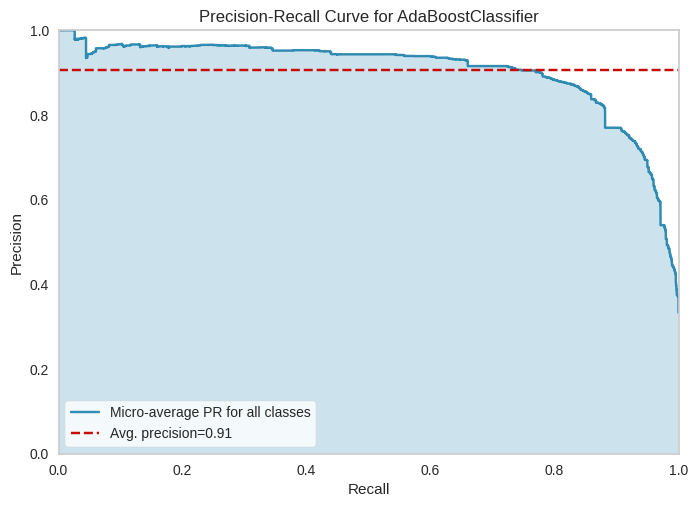

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [130]:
viz = PrecisionRecallCurve(model_ada)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

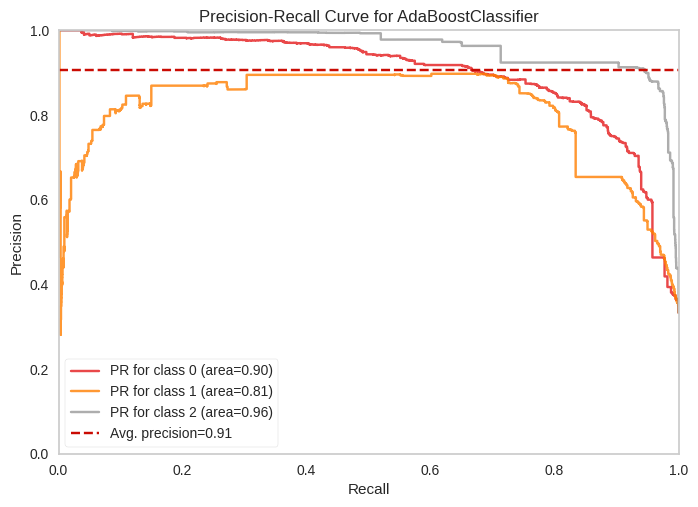

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [131]:
viz = PrecisionRecallCurve(model_ada,
    per_class=True,
    cmap="Set1")
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

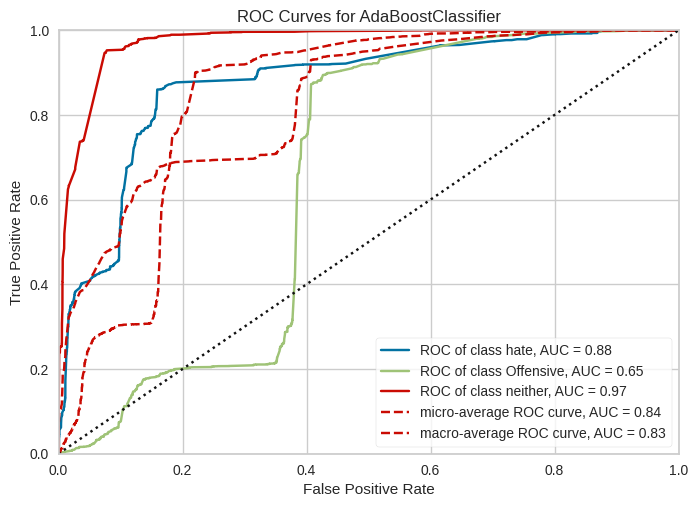

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'hate', 1: 'Offensive', 2: 'neither'},
       estimator=AdaBoostClassifier(random_state=1))

In [132]:
plot_ROC_curve(model_ada, x_train ,y_train, x_test, y_test)


Gradient Boosting Classifier Model

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
model_gra = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model_gra.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [134]:
predict_gra = model_gra.predict(x_test)

In [135]:
confusion_matrix(y_test,predict_gra)

array([[2549,  739, 1510],
       [ 332, 3773,  693],
       [  33,   53, 4712]])

In [136]:
print(classification_report(predict_gra, y_test))

              precision    recall  f1-score   support

           0       0.53      0.87      0.66      2914
           1       0.79      0.83      0.81      4565
           2       0.98      0.68      0.80      6915

    accuracy                           0.77     14394
   macro avg       0.77      0.79      0.76     14394
weighted avg       0.83      0.77      0.78     14394



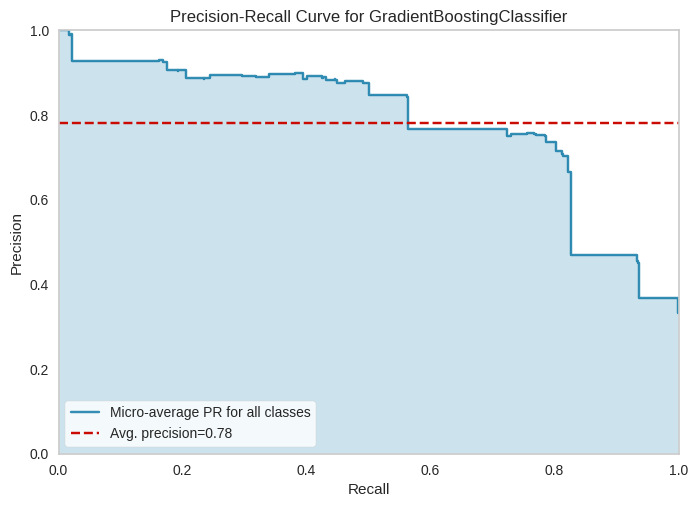

<AxesSubplot:title={'center':'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [137]:
viz = PrecisionRecallCurve(model_gra)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

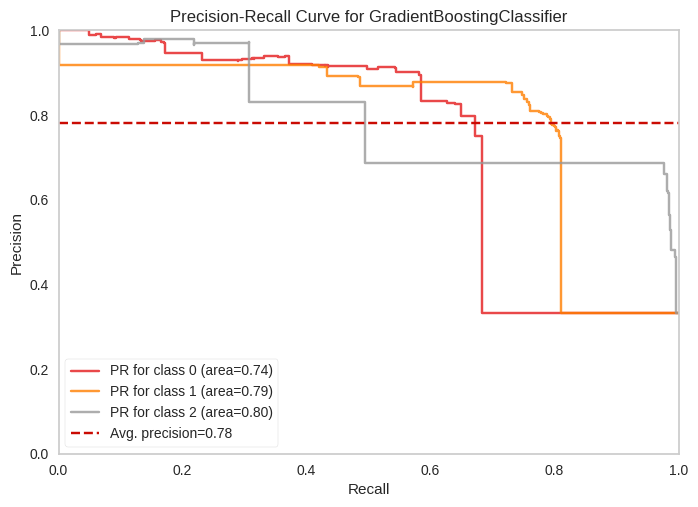

<AxesSubplot:title={'center':'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [138]:
viz = PrecisionRecallCurve(model_gra,
    per_class=True,
    cmap="Set1")
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

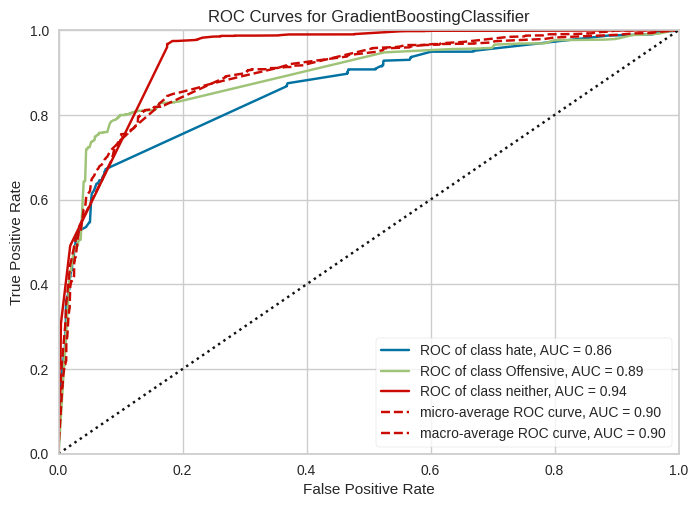

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'hate', 1: 'Offensive', 2: 'neither'},
       estimator=GradientBoostingClassifier(learning_rate=0.01, random_state=1))

In [139]:
plot_ROC_curve(model_gra, x_train ,y_train, x_test, y_test)

# Prediction

Best Model 

In [140]:
from sklearn.svm import SVC
model_best = SVC(C=1, gamma=1,kernel ='rbf')
model_best.fit(x_train,y_train)

SVC(C=1, gamma=1)

In [141]:
pred_svm = model_best.predict(x_test)

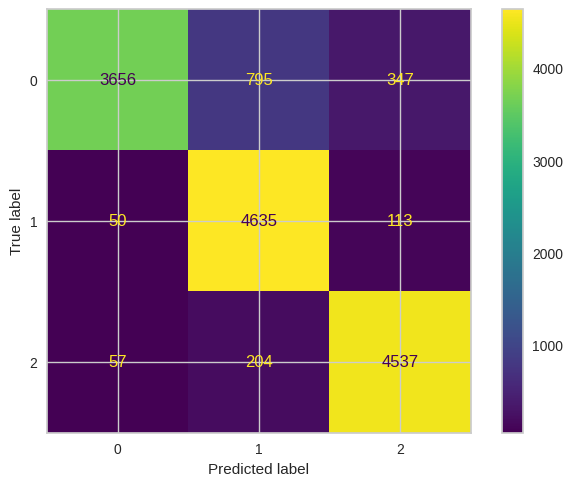

In [142]:
cm = confusion_matrix(y_test, pred_svm, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [143]:
print(classification_report(pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      3763
           1       0.97      0.82      0.89      5634
           2       0.95      0.91      0.93      4997

    accuracy                           0.89     14394
   macro avg       0.89      0.90      0.89     14394
weighted avg       0.91      0.89      0.89     14394



In [144]:
import pickle

In [145]:
pickle.dump(model_best, open('model_best.pkl','wb'))

In [146]:
with open('model_best_pickle','wb') as f:
  pickle.dump(model_best,f)

In [147]:
with open('model_best_pickle','rb') as f:
  mp=pickle.load(f)

In [ ]:
User_input = input("Enter your text:")

def predict(text):
  input_text = [text]
  text_to_vec = Tfidf_vect.transform(input_text).toarray() 
  prediction = mp.predict(text_to_vec)
  return prediction


output = predict(User_input)
print(output)
if output == 0:
  print('This is hate speech')
elif output == 1:
  print('This is offensive speech')
else:
  print('This is not offensive neither hate speech')